In [1]:
from qiskit import *
import networkx as nx
from edge_coloring import EdgeColoring
from dfs import DFS
from heuristic import Heuristic

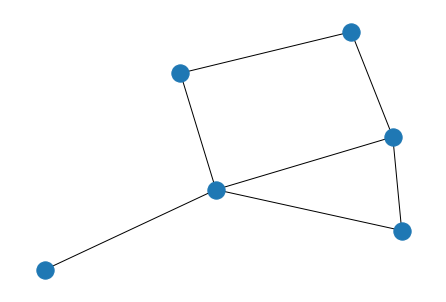

In [2]:
G = nx.erdos_renyi_graph(6,0.6)
nx.draw(G)

In [3]:
obj = EdgeColoring(G,0.57)
qc = obj.ec_ansatz(undo_gates=False)
print(qc.draw(fold=-1))
print("Depth of the circuit: ",qc.depth())

        ┌───┐                                                                                                                                            ░ ┌─┐               
   q_0: ┤ H ├──────────────■────■────────────────────────────■───────────────────────────────────────────────────────────────────────────────────────────░─┤M├───────────────
        ├───┤┌──────────┐┌─┴─┐  │                            │                                                                                           ░ └╥┘┌─┐            
   q_1: ┤ H ├┤ Rz(0.57) ├┤ X ├──┼───────■────────────────────┼────■────■────────────────────────────■────────────────────────────────────────────────────░──╫─┤M├────────────
        ├───┤└──────────┘└───┘  │       │                    │    │    │                            │                                                    ░  ║ └╥┘┌─┐         
   q_2: ┤ H ├──────────────■────┼───────┼────────────────────┼────┼────┼───────■────────────────────┼────■────────────────────────

In [4]:
obj = DFS(G,0.57,1)
qc = obj.dfs_ansatz(undo_gates=False)
print(qc.draw(fold=-1))
print("Depth of the circuit: ",qc.depth())

        ┌───┐┌──────────┐┌───┐                                                                 ░ ┌─┐               
   q_0: ┤ H ├┤ Rz(0.57) ├┤ X ├──■──────────────────────────────────────────────────────────────░─┤M├───────────────
        ├───┤└──────────┘└─┬─┘  │                                                              ░ └╥┘┌─┐            
   q_1: ┤ H ├──────────────■────┼───────────────────■────────────────■────■────────────────■───░──╫─┤M├────────────
        ├───┤┌──────────┐       │       ┌───┐       │                │    │                │   ░  ║ └╥┘┌─┐         
   q_2: ┤ H ├┤ Rz(0.57) ├───────┼───────┤ X ├───────┼────────────────┼────┼────────────────┼───░──╫──╫─┤M├─────────
        ├───┤├──────────┤       │  ┌───┐└─┬─┘     ┌─┴─┐┌──────────┐┌─┴─┐  │                │   ░  ║  ║ └╥┘┌─┐      
   q_3: ┤ H ├┤ Rz(0.57) ├───────┼──┤ X ├──■────■──┤ X ├┤ Rz(0.57) ├┤ X ├──┼────────────────┼───░──╫──╫──╫─┤M├──────
        ├───┤├──────────┤       │  └─┬─┘     ┌─┴─┐└───┘└──────────┘└───┘

In [5]:
obj = Heuristic(G,0.57,1)
qc = obj.heuristic_ansatz(undo_gates=False)
print(qc.draw(fold=-1))
print("Depth of the circuit: ",qc.depth())

        ┌───┐┌──────────┐┌───┐                                                                 ░ ┌─┐               
   q_0: ┤ H ├┤ Rz(0.57) ├┤ X ├───────■─────────────────────────────────────────────────────────░─┤M├───────────────
        ├───┤└──────────┘└─┬─┘       │                                                         ░ └╥┘┌─┐            
   q_1: ┤ H ├──────────────■────■────┼────■────────────────────────────────────────────────────░──╫─┤M├────────────
        ├───┤┌──────────┐       │    │    │  ┌───┐                                             ░  ║ └╥┘┌─┐         
   q_2: ┤ H ├┤ Rz(0.57) ├───────┼────┼────┼──┤ X ├─────────────────────────────────────────────░──╫──╫─┤M├─────────
        ├───┤├──────────┤     ┌─┴─┐  │    │  └─┬─┘                                             ░  ║  ║ └╥┘┌─┐      
   q_3: ┤ H ├┤ Rz(0.57) ├─────┤ X ├──┼────┼────■────■────────────────■────■────────────────■───░──╫──╫──╫─┤M├──────
        ├───┤├──────────┤     └───┘  │  ┌─┴─┐     ┌─┴─┐┌──────────┐┌─┴─┐